In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ramonawxj/PS4HouseDataExercise/master/train.csv')
print(data.shape)
train = data.iloc[0:1000,:]

train.to_json('housedata.json')
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# investigate Sale Price
train['SalePrice']

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

(array([ 99., 493., 254.,  93.,  38.,  15.,   4.,   2.,   1.,   1.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

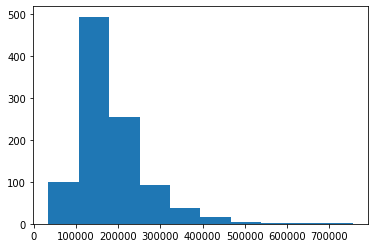

In [5]:
# plot hist
plt.hist(train['SalePrice'])

In [6]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1000, 38)

In [7]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:5].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [8]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,1710,2,548
1,6,1262,2,460
2,7,1786,2,608
3,7,1717,3,642
4,8,2198,3,836
...,...,...,...,...
995,4,1230,1,305
996,5,1050,1,368
997,6,1442,2,615
998,3,1077,1,210


In [9]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [10]:
# How good is the model
model.score(X,Y)

0.7600572914182073

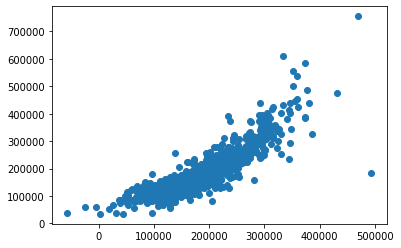

In [11]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [12]:
# Load test data
test = pd.read_csv('https://raw.githubusercontent.com/ramonawxj/PS4HouseDataExercise/master/test.csv')

In [13]:
test = test.iloc[:,:]

In [22]:
X_test = test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']]

In [24]:
predictions_test = model.predict(X_test)

In [28]:
from google.colab import files
testdata = {'Id': test.Id, 'SalePrice': predictions_test}
df = pd.DataFrame(data=testdata)
df.to_csv('predictions.csv', index=False)
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>